## **Análisis de Sistemas Térmicos usando Python**

Clase 4: Uso de coolprop para construir diagamas termodinámicos

In [1]:
pip install Coolprop
pip install beautifultable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import CoolProp.CoolProp as cp
import numpy as np
import matplotlib.pyplot as plt

Para este ejemplo nuevamente consideramos **Agua** como substancia de trabajo.

Definiremos como Temperatura de referencia 298 K y Presión de referenica 1 atmósfera: 101,325 kPa

In [18]:
fluid = "water"
ref_temp = 298 # K
ref_press = 101325 # Pa - 1 atm

En este ejemplo, analizaremos el proceso de vaporización de agua a 1 atm

Evaluaremos el estado inicial a condiciones ambientales (0), seguido por una adicion de calor hasta el estado de líquido saturado (1), luego evaluaremos el estado de vapor saturado (2) y finalmente evaluaremos el estado de vapor sobrecalentado a 200°C, donde todos los estados anteriores se mantienen a 1 atm.

In [28]:
T,P,h,D = [np.empty(4)]*4
Estado = []

Estado 0 : Agua líquida en la condición de referencia.

* Datos conocidos: Presión y temperatura
* Determinamos: Densidad y entalpía

In [20]:
Estado.append('Ambiente')
T[0] = ref_temp
P[0] = ref_press

h[0] = cp.PropsSI('H', 'T', T[0], 'P', P[0], fluid)
D[0] = cp.PropsSI('D', 'T', T[0], 'P', P[0], fluid)

Estado 1 - Líquido Saturado a la presión de referencia:

* Datos conocidos: Presión y Estado de líquido saturado (calidad de vapor igual a 0)
* Determinamos: Temperatura, Densidad y entalpía

In [21]:
Estado.append('L. Saturado')
P[1] = ref_press
T[1] = cp.PropsSI('T', 'Q', 0, 'P', P[1], fluid)

h[1] = cp.PropsSI('H', 'Q', 0, 'P', P[1], fluid)
D[1] = cp.PropsSI('D', 'Q', 0, 'P', P[1], fluid)

Estado 2 -  Vapor Saturado a la presión de referencia

* Datos conocidos: Presión y Estado de vapor saturado (calidad de vapor igual a 1)
* Determinamos: Temperatura, Densidad y entalpía

In [22]:
Estado.append('V. Saturado')
P[2] = ref_press
T[2] = cp.PropsSI('T', 'Q', 1, 'P', P[2], fluid)

h[2] = cp.PropsSI('H', 'Q', 1, 'P', P[2], fluid)
D[2] = cp.PropsSI('D', 'Q', 1, 'P', P[2], fluid)

Estado 3 - Vapor Sobrecalentado a 200°C y a la presión de referencia

* Datos conocidos: Presión y temperatura
* Determinamos: Densidad y entalpía

In [23]:
Estado.append('Sobrecalentado')
T[3] = 200 + 273.15 # K
P[3] = ref_press

h[3] = cp.PropsSI('H', 'T', T[3], 'P', P[3], fluid)
D[3] = cp.PropsSI('D', 'T', T[3], 'P', P[3], fluid)

Crearemos una Tabla de resumen de los estados termodinámicos

In [15]:
from beautifultable import BeautifulTable as bt

In [24]:
print('Estados termodinámicos - Sistema: ' + fluid)
table = bt()
table = bt(maxwidth=100)
table.columns.append(T, header="Temperatura\n[C]")
table.columns.append(P/1000, header="Presión\n[kPa]")
table.columns.append(h/1000, header="Entalpía\n[kJ/kg]")
table.columns.append(D, header="Densidad \n[kg/m3]")
table.rows.header = Estado
print(table)

Estados termodinámicos - Sistema: water
+----------------+-------------+---------+----------+-----------+
|                | Temperatura | Presión | Entalpía | Densidad  |
|                |     [C]     |  [kPa]  | [kJ/kg]  |  [kg/m3]  |
+----------------+-------------+---------+----------+-----------+
|    Ambiente    |    298.0    | 101.325 | 104.293  |  997.086  |
+----------------+-------------+---------+----------+-----------+
|  L. Saturado   |   373.124   | 101.325 | 419.058  |  958.367  |
+----------------+-------------+---------+----------+-----------+
|  V. Saturado   |   373.124   | 101.325 | 2675.529 |   0.598   |
+----------------+-------------+---------+----------+-----------+
| Sobrecalentado |   473.15    | 101.325 | 2875.389 |   0.466   |
+----------------+-------------+---------+----------+-----------+


Para crear una visualización grafica, debemos crear vectores adicionales para mostrar los tramos intemedios entre cada estado.

In [25]:
# Datos para variación T-D entre estados
n = 100 # Cantidad de puntos

# De estado ambiente a líquido saturado
T1 = np.linspace(T[0],T[1],n)
D1 = cp.PropsSI('D', 'T', T1, 'P', ref_press, fluid)

# De líquido saturado a vapor saturado
Q2 = np.linspace(0,1,n) # Calidad de 0 a 1
T2 = cp.PropsSI('T', 'Q', Q2, 'P', ref_press, fluid)
D2 = cp.PropsSI('D', 'Q', Q2, 'P', ref_press, fluid)

# De vapor saturado a vapor sobrecalentado
T3 = np.linspace(T[2],T[3],n)
D3 = cp.PropsSI('D', 'T', T3, 'P', ref_press, fluid)

Luego para crear el diagrama usamos la función PropertyPlot de la biblioteca **"CoolProp"**

c:\Users\jmcar\anaconda3\envs\Thermodynamics\lib\site-packages\CoolProp\Plots\Common.py:608: UserWarning: Please use "calc_sat_range" to calculate saturation and isoquality lines. Input ranges are discarded.
  warnings.warn(
c:\Users\jmcar\anaconda3\envs\Thermodynamics\lib\site-packages\CoolProp\Plots\Plots.py:217: UserWarning: Detected an incomplete phase envelope, fixing it numerically.
  warnings.warn("Detected an incomplete phase envelope, fixing it numerically.")


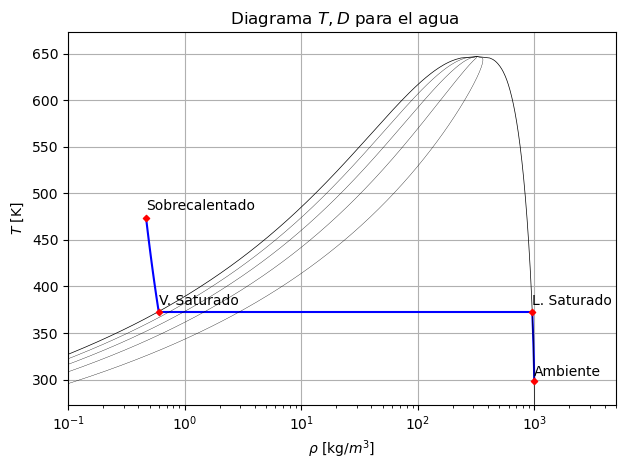

In [27]:
from CoolProp.Plots import PropertyPlot

# Creamos el Diagrama T-D
td_plot = PropertyPlot('Water', 'TD', tp_limits='ORC', unit_system='KSI')
td_plot.calc_isolines(cp.iQ, num=6)

# Anotaciones de los estados
ax = plt.gca() # Axis del PropertyPlot
ax.scatter(D,T,c='r',s=10,zorder=3,marker='D') # Puntos con los estado termodinámicos
e_v = 1.02 # Espaciamiento vertical
e_h = 1 # Espaciamiento horizontal

#Introducimos los estados calculados previamente
for i, txt in enumerate(Estado):
    plt.annotate(txt, (D[i]*e_h, T[i]*e_v))

# Colocamos lel vector de variación T-D entre estados
ax.plot(D1,T1,c='b')
ax.plot(D2,T2,c='b')
ax.plot(D3,T3,c='b')

#Finalmente organizamos el grafico estéticamente
ax.set_xlim(1e-1,5e3) # Modificar los límites 'ORC' en x
td_plot.title(r' Diagrama $T,D$ para el agua')
td_plot.xlabel(r'$\rho$ [kg/$m^3$]')
td_plot.ylabel(r'$T$ [K]')
td_plot.grid()
td_plot.show()